In [1]:
# 1 - OPPENHEIMER'S POSTER
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

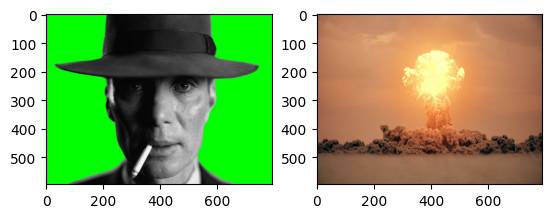

In [2]:
img1 = cv.imread("../images/oppenheimer.png")
img2 = cv.imread("../images/atomicbomb.jpg")

img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)

#both images need to be of same size
# img1 = cv.resize(img1,(1080,1920))
# img2 = cv.resize(img2,(1080,1920))
height = img1.shape[0]
width = img1.shape[1]
img2 = cv.resize(img2,(width,height))

plt.subplot(1,2,1)
plt.imshow(img1)

plt.subplot(1,2,2)
plt.imshow(img2)

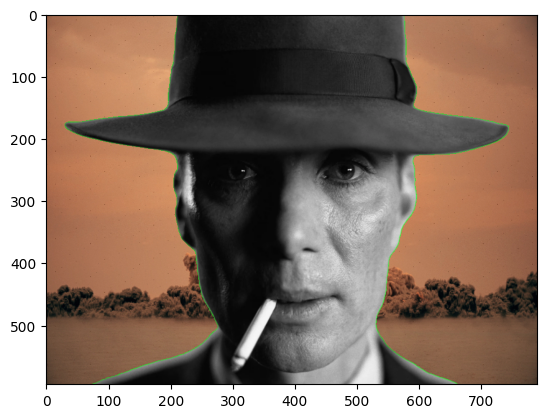

In [3]:
#since they are both of the same shape we replace the green pixels with this background
for i in range(height):
    for j in range(width):
        if img1[i][j][1] > 170 and img1[i][j][0] < 30 and img1[i][j][2] < 70:
            img1[i][j] = img2[i][j]

plt.imshow(img1)

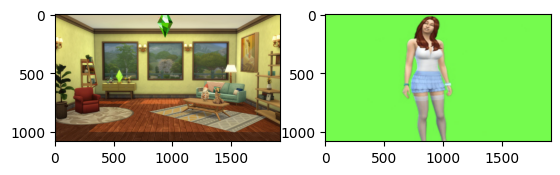

In [4]:
img1 = cv.imread("../images/sims1.jpeg")
img2 = cv.imread("../images/sims2.png")

img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)

#both images need to be of same size - standard size used is 1920 x 1080 - width,height
height = img1.shape[0]
width = img1.shape[1]
img2 = cv.resize(img2,(width,height))

plt.subplot(1,2,1)
plt.imshow(img1)

plt.subplot(1,2,2)
plt.imshow(img2)

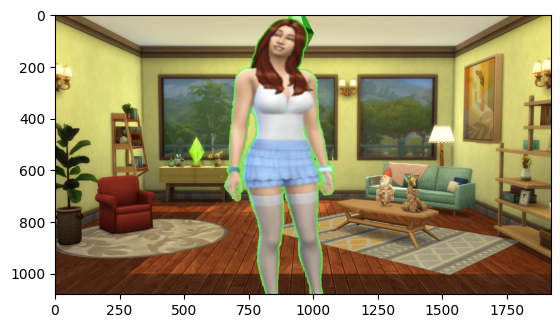

In [5]:
for i in range(height):
    for j in range(width):
        if img2[i][j][1] > 230 and img2[i][j][0] < 120 and img2[i][j][2] < 80:
            img2[i][j] = img1[i][j]

plt.imshow(img2)

In [6]:
######################################################

In [7]:
# 2 - QUANTIZED EXPLOSION

def bitQuantizeImage(img,k):
    # levels = int(256/k)
    # img = (np.round(img/levels) * levels).astype(np.uint8)
    red = img[:,:,0]
    blue = img[:,:,2]
    green = img[:,:,1]

    levels = pow(2,k)
    levels = 255/levels

    # convert all pixel intensities to the new range
    blue = (np.round(blue/levels) * levels).astype(np.uint8)
    red = (np.round(red/levels) * levels).astype(np.uint8)
    green = (np.round(green/levels) * levels).astype(np.uint8)

    img = np.stack((red,green,blue),axis=2) #stacking the channels together
    return img

# bit plane slicing
def bitSlicing(img,k):
    grey = img[:,:,0]
    ans = ((grey >> k) & 1)*255
    return np.stack((ans,ans,ans),axis = 2)

#greyscale function 
def greyscale(img):
    # (w,h) = img.shape[0:2]
    # for i in range(w):
    #     for j in range(h):
    #         (r,g,b) = img[i,j]
    #         img[i,j] = 0.21*r + 0.72*g + 0.07*b
    blue = img[:,:,2]
    red = img[:,:,0]
    green = img[:,:,1]

    blue = 0.07*blue
    green = 0.72*green
    red = 0.21*red

    grey = blue+green+red
    img = (np.stack((grey,grey,grey),axis=2)).astype(np.uint8) #stacking the channels together
    return img

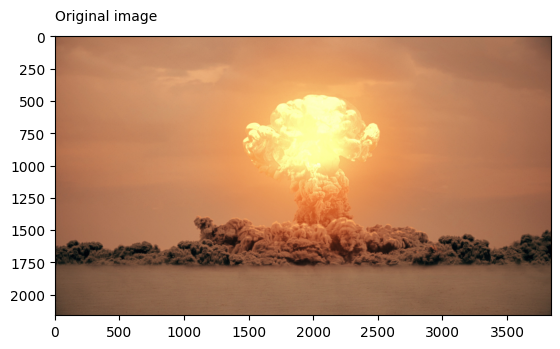

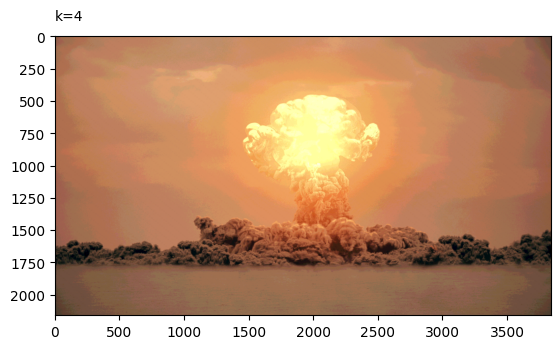

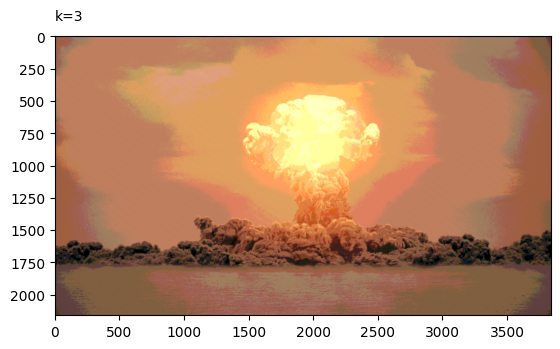

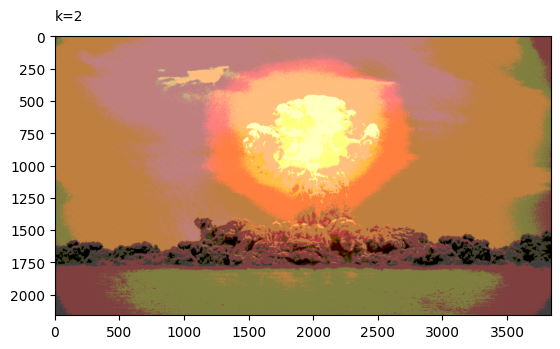

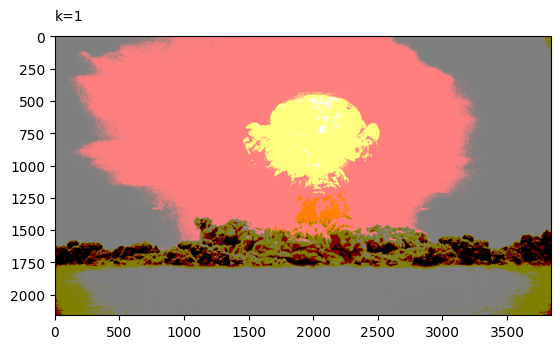

In [8]:
img = cv.imread("../images/atomicbomb.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.figure()
plt.text(0, 0, "Original image\n")
plt.imshow(img)

result = bitQuantizeImage(img,4)
plt.figure()
plt.text(0, 0, "k=4\n")
plt.imshow(result)

result = bitQuantizeImage(img,3)
plt.figure()
plt.text(0, 0, "k=3\n")
plt.imshow(result)

result = bitQuantizeImage(img,2)
plt.figure()
plt.text(0, 0, "k=2\n")
plt.imshow(result)

result = bitQuantizeImage(img,1)
plt.figure()
plt.text(0, 0, "k=1\n")
plt.imshow(result)

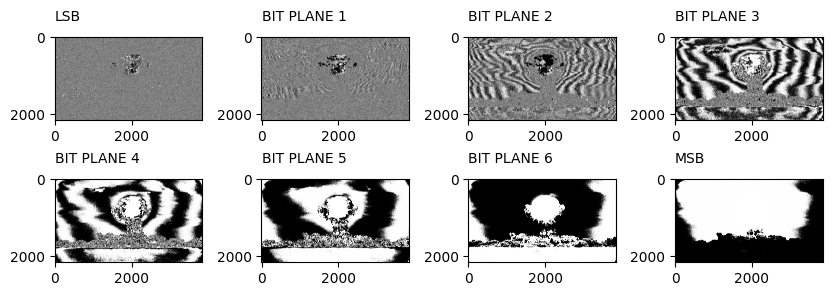

In [9]:
img = greyscale(img)

# adjust spacing between plots
plt.subplots_adjust(left=0.3,
                    bottom=0.1,
                    right=1.5,
                    top=1.2,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(4,4,1)
result = bitSlicing(img,0)
plt.imshow(result)
plt.text(0, 0, "LSB\n")
plt.subplot(4,4,2)
result = bitSlicing(img,1)
plt.imshow(result)
plt.text(0, 0, "BIT PLANE 1\n")
plt.subplot(4,4,3)
result = bitSlicing(img,2)
plt.imshow(result)
plt.text(0, 0, "BIT PLANE 2\n")
plt.subplot(4,4,4)
result = bitSlicing(img,3)
plt.imshow(result)
plt.text(0, 0, "BIT PLANE 3\n")
plt.subplot(4,4,5)
result = bitSlicing(img,4)
plt.imshow(result)
plt.text(0, 0, "BIT PLANE 4\n")
plt.subplot(4,4,6)
plt.text(0, 0, "BIT PLANE 5\n")
result = bitSlicing(img,5)
plt.imshow(result)
plt.subplot(4,4,7)
plt.text(0, 0, "BIT PLANE 6\n")
result = bitSlicing(img,6)
plt.imshow(result)
plt.subplot(4,4,8)
plt.text(0, 0, "MSB\n")
result = bitSlicing(img,7)
plt.imshow(result)

In [10]:
#######################################################

In [11]:
# 3 - COLOUR CORRECTED BARBIE
def linContrastStretching(img, a, b):
    height = img.shape[0]
    width = img.shape[1]

    blue = img[:,:,0]
    green = img[:,:,1]
    red = img[:,:,2]

    bmax = np.max(blue)
    rmax = np.max(red)
    gmax = np.max(green)

    bmin = np.min(blue)
    rmin = np.min(red)
    gmin = np.min(green)

    tempb = (b - a)/(bmax - bmin)
    tempg = (b - a)/(gmax - gmin)
    tempr = (b - a)/(rmax - rmin)

    # np.clip makes sure that the values are between the range of 0 and 255
    # astype uint8 makes sure that the data type is the right one for pixels(unsigned 8-bits)
    blue = np.clip(a + ((blue-bmin)*tempb),0,255).astype(np.uint8)
    green = np.clip(a + ((green-gmin)*tempg),0,255).astype(np.uint8)
    red = np.clip(a + ((red-rmin)*tempr),0,255).astype(np.uint8)
    
    # to stack the arrays together we use np.stack() with the axis = 2
    # axis = 2 is column wise stacking so it will be the columns of bgr in a row
    img = np.stack((blue,green,red),axis=2)
    # for i in range(height):
    #     for j in range(width):
    #         bl = a + ((img[i][j][0] - bmin)*tempb)
    #         g = a + ((img[i][j][1] - gmin)*tempg)
    #         r = a + ((img[i][j][2] - rmin)*tempr)
    #         img[i][j] = (bl,g,r)
    
    return img    

def frequentColors(img,k):
    uni,freq = np.unique(img, return_counts = True)
    max = []
    for i in range(k):
        temp = np.argmax(freq) # choose pixels with most freq
        freq[temp] = 0
        max.append(uni[temp])

    return max
    

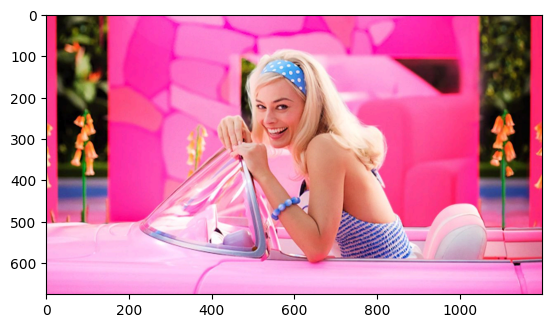

In [12]:
img = cv.imread("../images/barbie_flat.png")

output = linContrastStretching(img,0,255)
os.chdir("../images")
cv.imwrite("barbie.png",output)

# img is bgr so convert to rgb
output = cv.cvtColor(output,cv.COLOR_BGR2RGB)
plt.imshow(output)

k=5 most frequent colors in the original image: 
[55, 54, 45, 46, 52]

k=5 most frequent colors of the first output: 
[255, 250, 205, 210, 240]

k=5 most frequent colors of the second output: 
[150, 148, 130, 132, 144]

k=5 most frequent colors of the third output: 
[200, 198, 180, 182, 194]


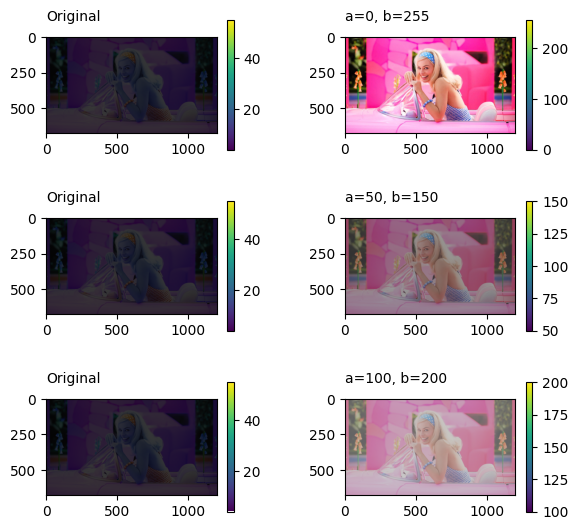

In [13]:
# output for different values of a and b

plt.subplot(4,2,1)
plt.imshow(img)
plt.text(0, 0, "Original\n")
plt.colorbar()
plt.subplot(4,2,3)
plt.imshow(img)
plt.text(0, 0, "Original\n")
plt.colorbar()
plt.subplot(4,2,5)
plt.imshow(img)
plt.text(0, 0, "Original\n")
plt.colorbar()
color = frequentColors(img,5)
print("k=5 most frequent colors in the original image: ")
print(color)
# adjust spacing between plots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.4)

output = linContrastStretching(img,0,255)
output = cv.cvtColor(output,cv.COLOR_BGR2RGB)
plt.subplot(4,2,2)
plt.imshow(output)
plt.text(0, 0, "a=0, b=255\n")
plt.colorbar()
color = frequentColors(output,5)
print("\nk=5 most frequent colors of the first output: ")
print(color)

output = linContrastStretching(img,50,150)
output = cv.cvtColor(output,cv.COLOR_BGR2RGB)
plt.subplot(4,2,4)
plt.imshow(output)
plt.text(0, 0, "a=50, b=150\n")
plt.colorbar()
color = frequentColors(output,5)
print("\nk=5 most frequent colors of the second output: ")
print(color)

output = linContrastStretching(img,100,200)
output = cv.cvtColor(output,cv.COLOR_BGR2RGB)
plt.subplot(4,2,6)
plt.imshow(output)
plt.text(0, 0, "a=100, b=200\n")
plt.colorbar()
color = frequentColors(output,5)
print("\nk=5 most frequent colors of the third output: ")
print(color)

In [14]:
#############################################################

In [15]:
# 4 - HISTOGRAM EQUALISATION
def histEqualization(img):
    grey = img[:,:,0] # all channels in greyscale image is same
    height = img.shape[0]
    width = img.shape[1]

    #calculate frequency of elements using numpy array
    uni,freq = np.unique(grey,return_counts = True)

    pdf = freq/(height*width) #calculating probability of unique frequencies
    cdf = np.cumsum(pdf) 
    result = np.round(254 * cdf)
    
    size = uni.shape[0]
    for i in range(size):
        grey[grey == uni[i]] = result[i] #map the old intensities to the new intensity range

    grey = np.stack((grey,grey,grey),axis=2) #stacking the channels together
    return grey
    

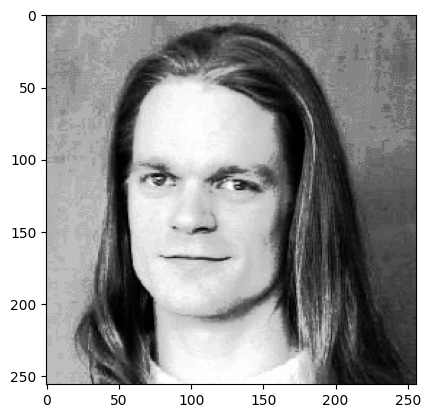

In [16]:
os.chdir("../images")
img = cv.imread("../images/low.png")
result = histEqualization(img)

cv.imwrite("high.png",result)
plt.imshow(result)

In [17]:
######################################################

In [18]:
# 5 - EXPLOSION EFFECTS
def pieceLinear(img,A,B):
    size = len(A)
    x = []
    y = []

    for i in range(size):
        # in numpy instead of using 'and' we use the logical_and function
        cond = np.logical_and(A[i][0] <= img, A[i][1] > img)
        temp = img[cond]
        t = B[i][0] * temp + B[i][1]
        img[cond] = t
        
        y.append(t.flatten())
        x.append(temp.flatten())
        # np.where(img>=A[i][0] and img < A[i][1],B[i][0]*img + B[i][1],img)

    x = [element for sub in x for element in sub]
    y = [element for sub in y for element in sub]
    return (img,x,y)


#greyscale function 
def greyscale(img):
    # (w,h) = img.shape[0:2]
    # for i in range(w):
    #     for j in range(h):
    #         (r,g,b) = img[i,j]
    #         img[i,j] = 0.21*r + 0.72*g + 0.07*b
    blue = img[:,:,2]
    red = img[:,:,0]
    green = img[:,:,1]

    blue = 0.07*blue
    green = 0.72*green
    red = 0.21*red

    grey = blue+green+red
    img = (np.stack((grey,grey,grey),axis=2)).astype(np.uint8) #stacking the channels together
    return img

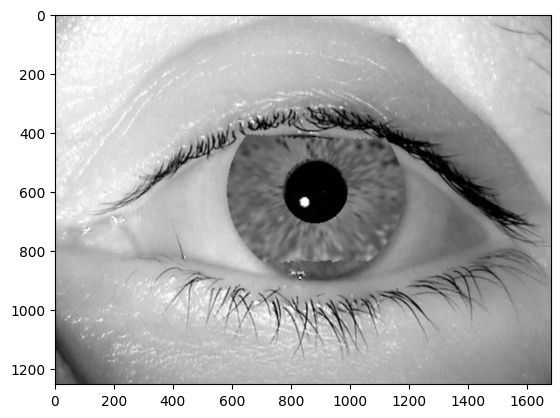

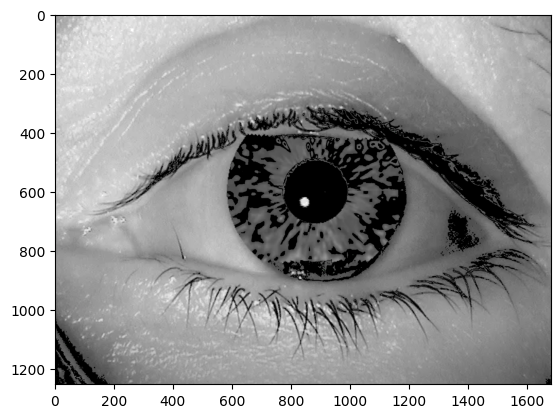

In [19]:
img1 = cv.imread("../images/iris1.png")
plt.figure()
plt.imshow(img1)

A1 = np.array([(0.0,0.2),(0.2,0.3),(0.3,0.4),(0.4,1)])
B1 = np.array([(0.0,0.0),(-1,0.7),(0.0,0.0),(1.0,-0.1)])

# since the intensities are between 0 and 1 => divide image by 255
img1 = img1/255
(result1,x1,y1) = pieceLinear(img1,A1,B1)

plt.figure()
plt.imshow(result1)

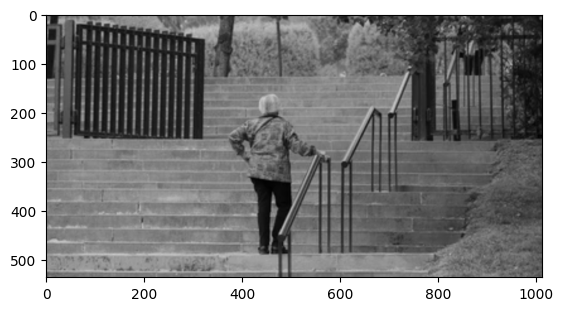

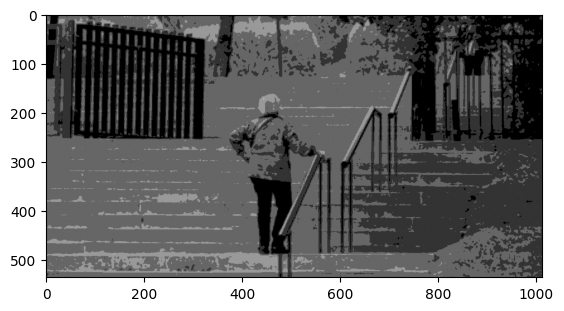

In [20]:
img2 = cv.imread("../images/stairs2.png")
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
img2 = greyscale(img2)
plt.figure()
plt.imshow(img2)

A2 = np.array([(0.0,0.2),(0.2,0.4),(0.4,0.6),(0.6,0.8),(0.8,1.0)])
B2 = np.array([(0.0,0.0),(0.0,0.2),(0.0,0.4),(0.0,0.6),(0.0,0.8)])
# since the intensities are between 0 and 1 => divide image by 255
img2 = img2/255
(result2,x2,y2) = pieceLinear(img2,A2,B2)
plt.figure()
plt.imshow(result2)

Text(0, 0.5, 'Transformed intensities')

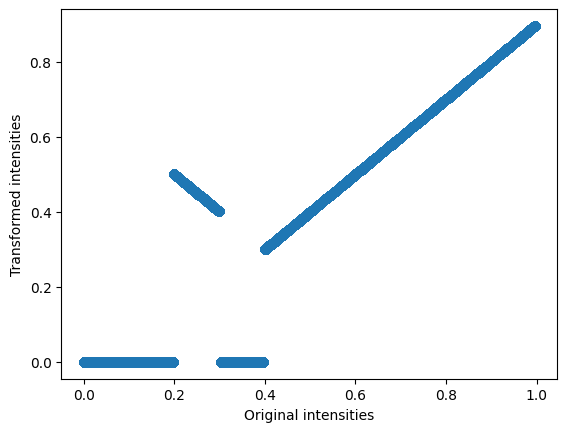

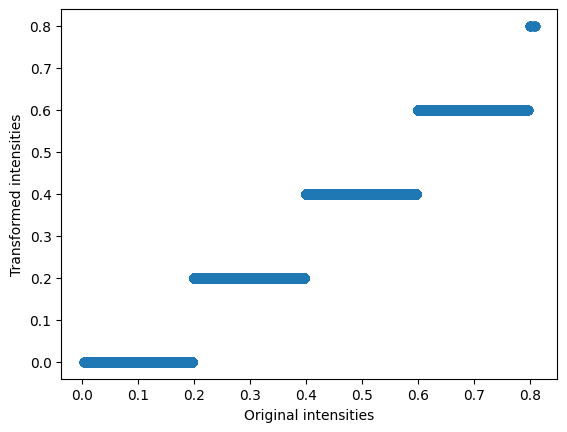

In [21]:
#plotting functions
plt.figure()
plt.scatter(x1,y1)
plt.xlabel("Original intensities")
plt.ylabel("Transformed intensities")
plt.figure()
plt.scatter(x2,y2)
plt.xlabel("Original intensities")
plt.ylabel("Transformed intensities")

In [22]:
#######################################################

In [23]:
# 6 - OPPIE'S FILTER

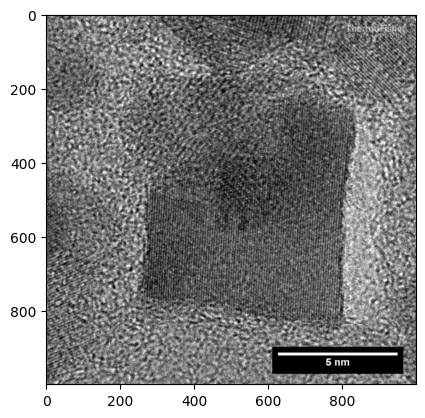

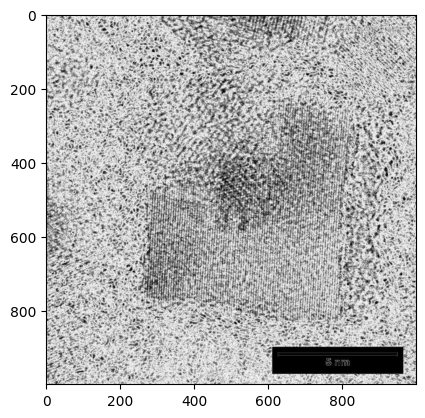

In [24]:
org = cv.imread("../images/micro.jpg")
trans = cv.imread("../images/transformed.png")

plt.figure()
plt.imshow(org)
plt.figure()
plt.imshow(trans) 

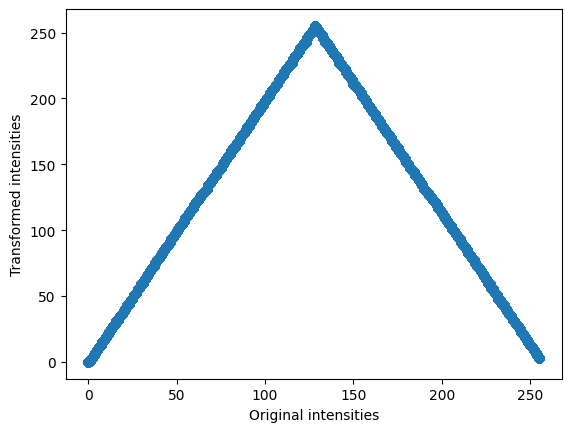

In [25]:
# finding relation between original and transformed intensities
orgarray = org[:,:,0]
orgarray = org.flatten()

transarray = trans[:,:,0]
transarray = trans.flatten()

# to find the range of plot
y = np.max(transarray)
ind = np.where(transarray == y)[0][0]
x = orgarray[ind]

plt.scatter(orgarray, transarray)
plt.xlabel("Original intensities")
plt.ylabel("Transformed intensities")

# applying this transfomation to other images
# but first we need to map this to linear functions
A = [(0,x),(x,y)]
m = (y/x)
c = 0
B = [(m,c),(-m,c)]

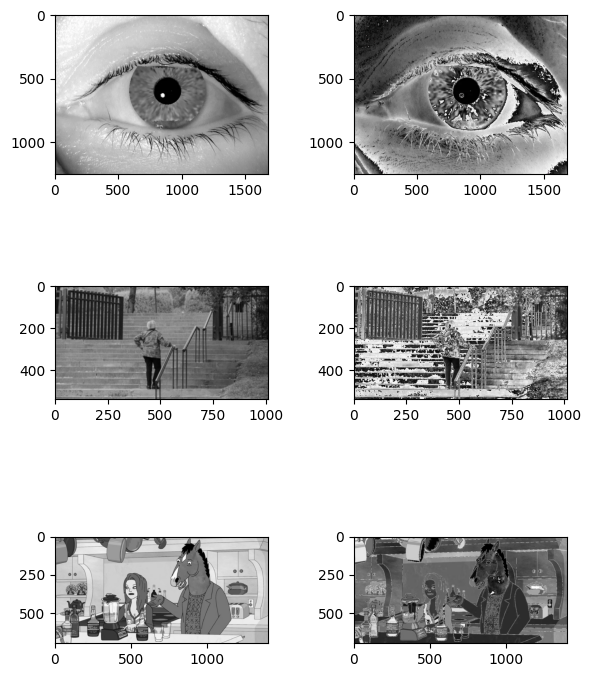

In [26]:
# adjust spacing between plots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.4)

img1 = cv.imread("../images/iris1.png")
plt.subplot(3,2,1)
plt.imshow(img1)
(result1,x1,y1) = pieceLinear(img1,A,B)
plt.subplot(3,2,2)
plt.imshow(result1)

img2 = cv.imread("../images/stairs2.png")
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
img2 = greyscale(img2)
plt.subplot(3,2,3)
plt.imshow(img2)
(result2,x2,y2) = pieceLinear(img2,A,B)
plt.subplot(3,2,4)
plt.imshow(result2)

img3 = cv.imread("../images/sarah.jpg")
img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
img3 = greyscale(img3)
plt.subplot(3,2,5)
plt.imshow(img3)
(result3,x3,y3) = pieceLinear(img3,A,B)
plt.subplot(3,2,6)
plt.imshow(result3)

In [27]:
# FIN.